In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def count_vectorizer(text):
    
    '''
    This function will be return the bag of words
    '''
    
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text)
    return bag_of_words

In [3]:
def train_and_test(dataframe, target):
    
    '''
    This function will be return the score of Logistic Regression
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(dataframe, target, random_state=42)
    logistic_model = LogisticRegression(solver='lbfgs')
    logistic_model.fit(X_train, y_train)
    
    accuracy = logistic_model.score(X_test, y_test)
    return accuracy
    

In [36]:
def cloud_of_words(df, type_column):

    search = df[df.sentiment == type_column]
    all_words = ' '.join(list(search.text_pt))
    cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(cloud, interpolation='bilinear')
    plt.show()


In [4]:
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


### Negative

In [5]:
df.text_pt[189]

'Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'

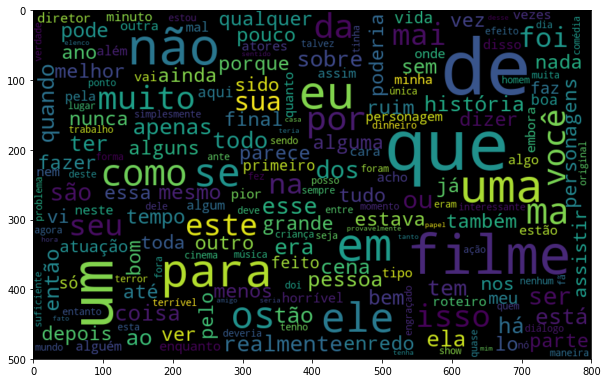

In [37]:
cloud_of_words(df, 'neg')

### Positive

In [6]:
df.text_pt[49002]

'Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você

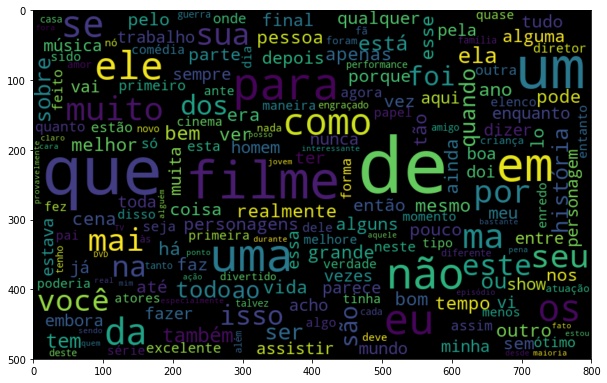

In [38]:
cloud_of_words(df, 'pos')

In [7]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [8]:
target = df.sentiment.replace(["neg", "pos"], [0, 1])

In [9]:
df['target'] = target

In [10]:
df.head()

,id,text_en,text_pt,sentiment,target
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [11]:
df.tail()

,id,text_en,text_pt,sentiment,target
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


### Vectorizing 

In [12]:
bag_of_words = count_vectorizer(df.text_pt)

### Train & Test

In [13]:
accuracy = train_and_test(bag_of_words, df.target)
accuracy

0.6583097452486858

### Visualization 

In [20]:
all_words = ' '.join(list(df.text_pt))
cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

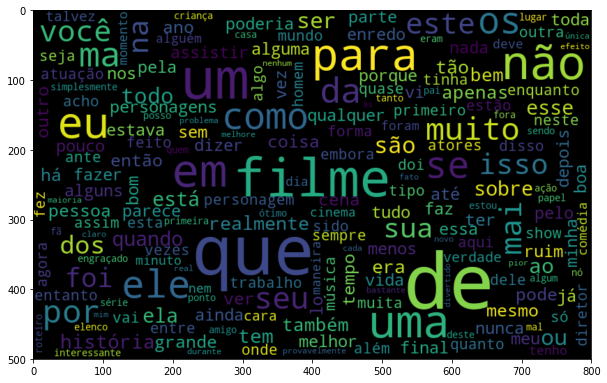

In [21]:
plt.figure(figsize=(10, 7))
plt.imshow(cloud, interpolation='bilinear')
plt.show()